1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [2]:
xls = pd.ExcelFile('C:\\Users\\trann\\OneDrive\
\Dokumente\\1ThuyDung_HDA\\ML\\User_Knowledge_Modeling_DataSet.xls')
df = pd.read_excel(xls, 'User_Knowledge_Modeling_DataSet')

In [3]:
df.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


Attribute Information:
STG (The degree of study time for goal object materails),
SCG (The degree of repetition number of user for goal object materails)
STR (The degree of study time of user for related objects with goal object)
LPR (The exam performance of user for related objects with goal object)
PEG (The exam performance of user for goal objects)
UNS (The knowledge level of user)
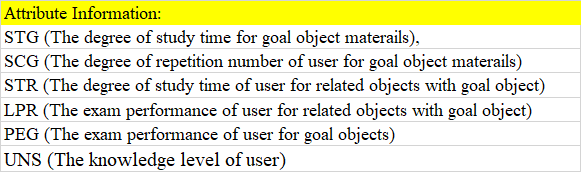

In [4]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [5]:
# make sure there is no string
UNS_class = []
for i in df[' UNS']:
    if i == 'very_low':
        UNS_class.append(0)
    elif i == 'Low':
        UNS_class.append(1)
    elif i == 'Middle':
        UNS_class.append(2)
    else:
        UNS_class.append(3) # High
df['UNS_class']=UNS_class
data = df.drop(columns=[' UNS'], axis = 1)
data.head()

,STG,SCG,STR,LPR,PEG,UNS_class
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


In [6]:
# choosing target value
y = data.UNS_class.values

#choosing independent value
X = data.drop(columns=['UNS_class']).values

In [7]:
#splitting value into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

2.Build a model using Perceptron and MLPClassifier. On the basis of experiments with MLPClassifier, select best values for learning rate, the regularization parameter, the optimization function. Try different architectures for the MLPClassifier (number of hidden layers and number of neurons in each layer). Use f1 score for evaluation.

In [8]:
# Perceptron is only for binary classification tasks. => not for my data
# MLPClassifier Multi_layer Perceptron classifier 

#model = MLPClassifier(hidden_layer_sizes= (1000,))
model = MLPClassifier(hidden_layer_sizes= (200,))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [9]:
from sklearn import metrics
print('accuracy : {:.2f}%'.format(100*model.score(X_test, y_test)))

# f1 score is just for binary-classification.
# This case is multivariate- classification


accuracy : 77.78%


In [10]:
parameters = {
    'learning_rate':['constant','invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'max_fun':[15000]
             }


In [11]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [12]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)

In [13]:
model.fit(X,y)
model_grid = GridSearchCV(model, parameters, scoring="f1_macro", cv=skf)
model_grid.fit(X,y)
model_grid.best_params_

{'alpha': 0.0001, 'learning_rate': 'adaptive', 'max_fun': 15000}

3.Build learning curves for better explanation of your experiments for training set and validation set on the same plot (f1 score on the max_iter param for MLPClassifier)

In [14]:
from sklearn.model_selection import validation_curve, learning_curve

In [17]:
max_iters = np.linspace(20, 200, 20) 
val_train, val_test = validation_curve(model, X, y,
                                      'max_iter', max_iters, cv = 5, scoring = "f1_macro")
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

def plot_learning_curve(alpha = 0.1, learning_rate = "invscaling", max_fun=15000):
    training_sizes = np.linspace(0.05, 1, 20)
    model = MLPClassifier(hidden_layer_sizes= (200,),alpha = alpha, learning_rate = learning_rate, max_fun = max_fun)
    N_train, train_scores, test_scores = learning_curve(
    model,
    X, 
    y, 
    cv = skf,
    n_jobs = None,
    train_sizes = training_sizes,
    scoring = "f1_macro"
    )
    plot_with_err(max_iters, train_scores, label="training scores")
    plot_with_err(max_iters, test_scores, label="validation scores")
    plt.xlabel('max_iter')
    plt.ylabel('f1')
    plt.legend()
    plt.grid(True)



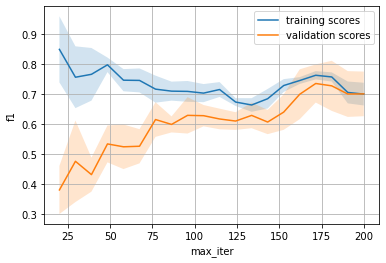

In [18]:
plot_learning_curve()